**1. Завантажте набір даних Concrete, як це показано у розділі «Поширені прийоми генерації ознак. Математичні перетворення» теми «Вступ до генерації ознак. Відбір ознак».**

In [41]:
!pip install yellowbrick
import pandas as pd
import pickle
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [42]:
with open('mod_05_topic_10_various_data.pkl', 'rb') as file:
    datasets = pickle.load(file)

In [43]:
concrete = datasets['concrete']
df_concrete = pd.DataFrame(concrete)
df_concrete.to_csv(r'concrete.csv')

**2. Використайте прийом підрахунку кількості для створення нової ознаки Components, яка вказуватиме на кількість задіяних складових у різних рецептурах бетону.**

In [44]:
df_concrete['Components'] = df_concrete[['Cement', 'BlastFurnaceSlag',
                                         'FlyAsh', 'Water',
                                         'Superplasticizer',
                                         'CoarseAggregate', 
                                         'FineAggregate']].gt(0).sum(axis=1)

df_concrete.head(30)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,CompressiveStrength,Components
0,102.0,153.0,0.0,192.0,0.0,887.0,942.0,25.46,5
1,108.3,162.4,0.0,203.5,0.0,938.2,849.0,29.23,5
2,116.0,173.0,0.0,192.0,0.0,909.8,891.9,31.02,5
3,122.6,183.9,0.0,203.5,0.0,958.2,800.1,33.19,5
4,132.0,206.5,160.9,178.9,5.5,866.9,735.6,33.31,7
5,132.0,207.0,161.0,179.0,5.0,867.0,736.0,33.30,7
6,133.0,200.0,0.0,192.0,0.0,927.4,839.2,36.59,5
7,133.0,210.0,0.0,196.0,3.0,949.0,795.0,31.03,6
8,133.1,210.2,0.0,195.7,3.1,949.4,795.3,28.94,6
9,134.7,0.0,165.7,180.2,10.0,961.0,804.9,13.29,6


**3. Нормалізуйте набір даних за допомогою об’єкта StandardScaler з пакета sklearn для подальшої кластеризації.**

In [45]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_concrete.drop(columns=['Components']))
scaled_df = pd.DataFrame(scaled_data, columns=df_concrete.columns[:-1])
scaled_df['Components'] = df_concrete['Components'].values
scaled_df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,CompressiveStrength,Components
0,-1.571417,0.785676,-0.937685,0.424376,-1.249389,-0.834174,2.426039,-0.870833,5
1,-1.510484,0.892770,-0.937685,1.021584,-1.249389,-0.224074,1.155086,-0.628514,5
2,-1.436011,1.013536,-0.937685,0.424376,-1.249389,-0.562489,1.741364,-0.513461,5
3,-1.372177,1.137720,-0.937685,1.021584,-1.249389,0.014246,0.486810,-0.373984,5
4,-1.281261,1.395202,1.491447,-0.255922,-0.230502,-1.073686,-0.394658,-0.366271,7


**4. Визначте оптимальну кількість кластерів за допомогою об'єкта KElbowVisualizer з пакета yellowbrick.**

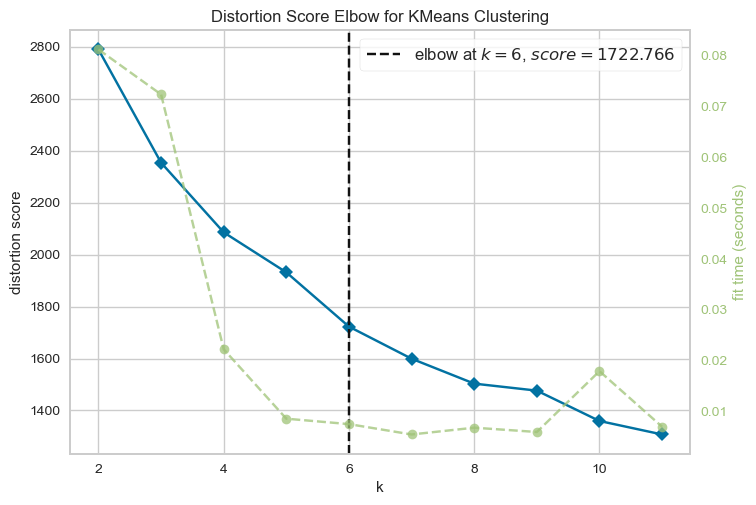

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,12))

visualizer.fit(scaled_df.drop(columns=['Components'])) 
visualizer.show()

**5. Проведіть кластеризацію методом k-середніх і отримайте мітки для кількості кластерів, визначеної на попередньому кроці.**

In [50]:
kmeans = KMeans(n_clusters=6, random_state=42)

clusters = kmeans.fit_predict(scaled_df.drop(columns=['Components']))
scaled_df['Cluster'] = clusters

**6. Використайте оригінальний набір вхідних даних для розрахунку описової статистики кластерів («звіту»): розрахуйте медіани для кожної ознаки, включаючи підрахунок кількості компонент по кожному кластеру за допомогою методу groupby, описаному в розділі «Практика виконання EDA в Pandas. Операції GroupBy» теми «Дослідницький аналіз даних (EDA)».**

In [51]:
df_concrete['Cluster'] = clusters

cluster_medians = df_concrete.groupby('Cluster').median()
cluster_medians

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,CompressiveStrength,Components
Cluster,,,,,,,,,
0,216.55,0.00,123.95,161.25,9.95,1006.30,794.20,49.370,6.0
1,201.75,175.05,0.00,185.70,4.80,964.40,759.30,39.370,6.0
2,251.40,0.00,118.30,187.05,9.00,889.85,780.05,32.245,6.0
3,425.00,94.70,0.00,157.00,10.30,944.70,782.50,66.700,6.0
4,337.75,0.00,0.00,189.50,0.00,1039.00,774.50,33.390,4.0
5,155.60,151.00,125.90,192.35,8.00,895.10,695.00,31.860,7.0


**7. Додайте до звіту кількість об'єктів (рецептур) у кожному з кластерів.**

In [52]:
cluster_counts = df_concrete.groupby('Cluster').size()

cluster_report = cluster_medians.copy()
cluster_report['Count'] = cluster_counts

cluster_report

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,CompressiveStrength,Components,Count
Cluster,,,,,,,,,,
0,216.55,0.00,123.95,161.25,9.95,1006.30,794.20,49.370,6.0,46
1,201.75,175.05,0.00,185.70,4.80,964.40,759.30,39.370,6.0,104
2,251.40,0.00,118.30,187.05,9.00,889.85,780.05,32.245,6.0,98
3,425.00,94.70,0.00,157.00,10.30,944.70,782.50,66.700,6.0,39
4,337.75,0.00,0.00,189.50,0.00,1039.00,774.50,33.390,4.0,80
5,155.60,151.00,125.90,192.35,8.00,895.10,695.00,31.860,7.0,60


**8. Проаналізуйте звіт та зробіть висновки.**

### Висновки:

1. Після застосування методу «лікоть» оптимальна кількість кластерів була визначена як **6**, що забезпечило розподіл даних на шість окремих груп з різними характеристиками складу бетону.

2. За результатами кластеризації:
   - **Кластер 3** виявився найбільш ефективним з точки зору **міцності на стиск (66.70)**, що обумовлено високим вмістом цементу та BlastFurnaceSlag. Цей кластер має найкращі показники якості бетону, хоча включає найменшу кількість рецептів.
   - **Кластер 5** містить найбільшу кількість компонентів (7), однак, його **міцність на стиск (31.86)** є найнижчою серед усіх кластерів. Це свідчить про неефективність композиції при збільшеній кількості складових.
   - **Кластер 1** є найбільшим за кількістю рецептів (**104**), проте має низьку **міцність на стиск (39.37)**, що вказує на його популярність серед простих рецептів, але недостатню ефективність для виготовлення міцного бетону.
   - **Кластер 0** виявився відносно збалансованим, з **міцністю на стиск 49.37**, що робить його придатним для застосування в умовах середньої складності рецептів.

3. З цих результатів можна зробити висновок, що найбільш ефективним для створення міцного бетону є **кластер 3**, в той час як **кластер 5** і **кластер 1** потребують оптимізації, оскільки збільшення кількості компонентів не гарантує високих показників міцності.

4. Для подальшого вдосконалення рецептур слід звернути увагу на склади з кластера 3, оскільки вони демонструють найвищі результати, а також дослідити можливості покращення композицій кластерів з низькою міцністю на стиск.